Seed: 39698
Number of iterations in the adjacency loop: 34
Initial connections Caleb Johnson: 1
Initial connections Ryan Mcghee: 8
Initial connections Victor Solomon: 6
Initial connections Sandra Manwaring: 5
Initial connections Corey Bouchard: 1
Initial connections Michael Reeve: 6
Initial connections Tommy Myers: 2
Initial connections Priscilla Love: 8
Initial connections Charles Montgomery: 6
Initial connections Robert Turner: 7
Initial connections Terry Haygood: 7
Initial connections Monroe Gonzalez: 10
Initial connections Jennie Hackney: 5
Initial connections Ester Sabbagh: 4
Initial connections Latesha Barnett: 1
Initial connections James Levinson: 3
Initial connections Edmundo Merchant: 6
Initial connections Richard Moore: 2
Initial connections Robert Serano: 6
Initial connections Timothy Doll: 2
Initial connections Richard Rutter: 3
Initial connections Anna Roberts: 3
Initial connections Charles Hayes: 3
Initial connections Sandra Moore: 7
Initial connections William Foster: 2


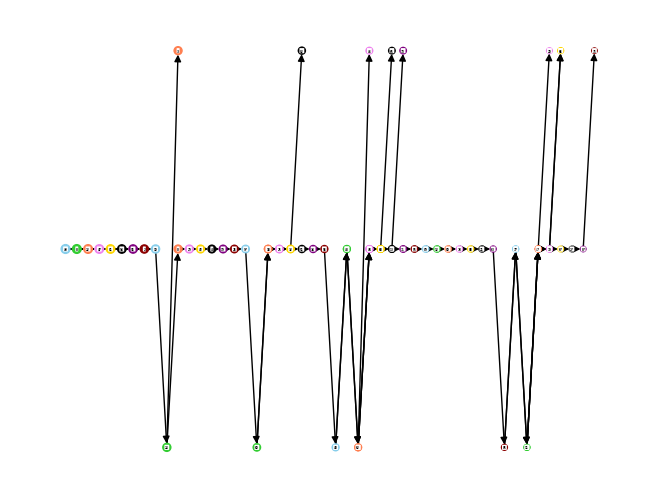

In [5]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch,FancyBboxPatch

import pandas as pd
from Simulation import*
from Rumor import Rumor
from collections import deque
from User import User
from AdjacencyMatrix import AdjacencyMatrix
import names

def tree_to_graph_with_levels(tree):
    graph = nx.DiGraph()
    levels = {}

    for node in tree.all_nodes():
        graph.add_node(node.identifier)
        levels[node.identifier] = tree.depth(node)

    for node in tree.all_nodes():
        parent = tree.parent(node.identifier)
        if parent:
            graph.add_edge(parent.identifier, node.identifier)

    return graph, levels

def generate_node_size_list(levels, base_size=40, size_factor=0.98):
    node_size_list = []

    for node in levels:
        level = levels[node]
        node_size = base_size * (size_factor ** level)
        node_size_list.append(node_size)

    return node_size_list


def generate_color_map(levels):
    color_map = []

    # Define the color palette for each level
    color_palette = ['skyblue', 'limegreen', 'coral', 'violet', 'gold','black','purple','darkred']

    for node in levels:
        level = levels[node]
        color_map.append(color_palette[level % len(color_palette)])

    return color_map

def tree_layout(tree, graph):
    pos = {}
    for node in graph.nodes():
        pos[node] = (tree.depth(node), -len(tree.children(node)))

    return pos


def get_unique_levels_and_colors(levels, color_map):
    unique_levels = sorted(set(levels.values()))
    unique_colors = [color_map[list(levels.values()).index(level)] for level in unique_levels]
    return unique_levels, unique_colors

if __name__ == "__main__":
    random_val = random.randint(0,1234132)
    print(f"Seed: {random_val}")
    random.seed(random_val)
    rumor_num = 1
    sim = Simulation(100, int_range=(4, 6))
    rumor_list = []
    for i in sim.pickUsers(rumor_num):
        g = Rumor(1, i, sim)
        rumor_list.append(g)
    rumor_tree = rumor_list[0]._tree
    for i in rumor_list[0]._tellers:
        print(f"Initial connections {i._name}: {len(i.connections)}")
    breakpoint()
    depth = rumor_tree.depth()
    print(depth)
    graph,levels = tree_to_graph_with_levels(rumor_tree)
    color_map = generate_color_map(levels)
    unique_levels, unique_colors = get_unique_levels_and_colors(levels, color_map)
    print(len(unique_levels))
    node_size_list = generate_node_size_list(levels)
    pos = tree_layout(rumor_tree, graph)
    nx.draw(graph, pos, node_size=node_size_list, node_color=color_map)
    #nx.draw_networkx_edge_labels(graph, pos)

    # Draw node labels with a white background
    labels = {node: node for node in graph.nodes()}
    label_bbox = dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
    nx.draw_networkx_labels(graph, pos, labels, font_size=2, font_weight='bold', bbox=label_bbox)

    # Create legend
    #legend_elements = [Patch(facecolor=color, edgecolor=color, label=f'Level {level}') for level, color in zip(unique_levels, unique_colors)]
    #plt.legend(handles=legend_elements, loc='best', title='Node Levels')

    plt.show()


